# SciANN-Regression.py

An illustrain to use SciANN for regression.

For additional details, please check our paper at: https://arxiv.org/abs/2005.08803 
    
Created by Ehsan Haghighat on 11/15/20.

In [1]:
# You need to have tensorflow, keras, and sciann installed in your system. 
# On google cloud, uncomment next line to install sciann. 

# !pip install sciann 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sciann as sn 

---------------------- SCIANN 0.5.4.0 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 



# SciANN for Linear Regression  

The objective is to fit NN on data generated from 
$$
y = A (\sin\omega t - \beta \sin \bar{\omega}t) + \epsilon, \quad \epsilon \sim N(0,\sigma^2) = \sigma N(0,1)
$$

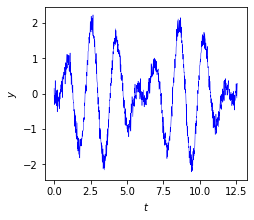

In [3]:
omega = 2*np.pi/2.0
omega_bar = 2*np.pi/1.5
A = 1.0
beta = 1.0

NDATA = 1000

t_data = np.linspace(0, 4*np.pi, NDATA)
y_data = A*(np.sin(omega*t_data) - beta*np.sin(omega_bar*t_data))

# Add noise
y_noise = 0.15*np.std(y_data)*np.random.randn(NDATA)

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(t_data, y_data + y_noise, 'b', lw=0.5)
# plt.plot(t_data, y_data, '--r')
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
plt.subplots_adjust(0.15, 0.15, 0.85, 0.95)
plt.savefig('data.pdf', dpi=300)

## Step 1
The first step is to define the approxmation using neural networks. Here, we use a single-layer Fourier-series type network with 100 units: 

In [4]:
x = sn.Variable('x')
o = sn.Field('y')
y = sn.Functional(o, x, [20], 'sin')

You can check initial values of network weights and biasses as:

You can eval a functional using the `eval' function:

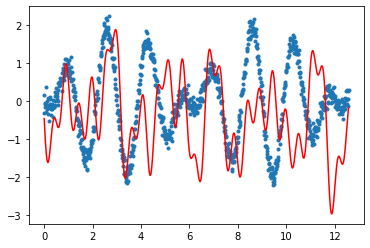

In [5]:
y_pred = y.eval(t_data)

plt.plot(t_data, y_data + y_noise, '.')
plt.plot(t_data, y_pred, 'r')

## Step 2
The second step is the define the optimization model, i.e., main inputs of the network and targets (objtives). This is done using SciModel interface:

In [6]:
d1 = sn.Data(y)
m = sn.SciModel(x, d1)

Once the model is defined, we can use the `train' function to identify the parameters of the network: 

In [7]:
m.train(t_data, y_data + y_noise, learning_rate=0.001, epochs=10000, batch_size=100)

Train on 1000 samples
Epoch 1/10000
1000/1000 [==============================] - 0s 11us/sample - loss: 1.6171
Epoch 2/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 1.0340
Epoch 3/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.7034
Epoch 4/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.5838
Epoch 5/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.5054
Epoch 6/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.4464
Epoch 7/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.4032
Epoch 8/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.3692
Epoch 9/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.3431
Epoch 10/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.3181
Epoch 11/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.2956
Epoch 1

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 184/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 185/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 186/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 187/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 188/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 189/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0218
Epoch 190/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 191/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 192/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0218
Epoch 193/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0218
Epoch 194/10000
1000/1000 

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 366/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0218
Epoch 367/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 368/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0220
Epoch 369/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 370/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 371/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 372/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 373/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 374/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 375/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 376/10000
1000/1000 

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 548/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 549/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 550/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 551/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 552/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 553/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 554/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 555/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 556/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 557/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 558/10000
1000/1000 

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 730/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0220
Epoch 731/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 732/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 733/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 734/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 735/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 736/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 737/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0225
Epoch 738/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0228
Epoch 739/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0224
Epoch 740/10000
1000/1000 

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 912/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 913/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 914/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 915/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0222
Epoch 916/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 917/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 918/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0216
Epoch 919/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0222
Epoch 920/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 921/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 922/10000
1000/1000 

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 1003/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 1004/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 1005/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 1006/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 1007/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 1008/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0220
Epoch 1009/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0222
Epoch 1010/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 1011/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0224
Epoch 1012/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 1013/10000

Epoch 1182/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 1183/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 1184/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0219
Epoch 1185/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 1186/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 1187/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0221
Epoch 1188/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 1189/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 1190/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 1191/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 1192/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 1273/10000
1000/1000 [==============================] - 0s 9us/sample - loss: 0.0216
Epoch 1274/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 1275/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0219
Epoch 1276/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0218
Epoch 1277/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 1278/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0214
Epoch 1279/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0216
Epoch 1280/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0215
Epoch 1281/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 1282/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 1283/10000

Epoch 1362/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 1363/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0217
Epoch 1364/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0220
Epoch 1365/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 1366/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 1367/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0218
Epoch 1368/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 1369/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0214
Epoch 1370/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0216
Epoch 1371/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 1372/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0220

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 1453/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 1454/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 1455/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 1456/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 1457/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 1458/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 1459/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 1460/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0219
Epoch 1461/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 1462/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0220
Epoch 1463/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 1633/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 1634/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 1635/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 1636/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 1637/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 1638/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 1639/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 1640/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 1641/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 1642/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 1643/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 1813/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 1814/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 1815/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 1816/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 1817/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 1818/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 1819/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 1820/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 1821/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 1822/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 1823/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 1993/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 1994/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0218
Epoch 1995/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 1996/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 1997/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 1998/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 1999/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0220
Epoch 2000/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0218
Epoch 2001/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 2002/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 2003/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2173/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 2174/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 2175/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 2176/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 2177/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 2178/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2179/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 2180/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 2181/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 2182/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 2183/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2353/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 2354/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2355/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 2356/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0219
Epoch 2357/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 2358/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 2359/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 2360/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2361/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 2362/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 2363/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 2533/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 2534/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 2535/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 2536/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 2537/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 2538/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 2539/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 2540/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 2541/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2542/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 2543/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 2713/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 2714/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 2715/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 2716/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 2717/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 2718/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 2719/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 2720/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 2721/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 2722/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2723/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 2893/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 2894/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 2895/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 2896/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 2897/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2898/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2899/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 2900/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0219
Epoch 2901/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 2902/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 2903/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 3073/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 3074/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 3075/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 3076/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 3077/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0220
Epoch 3078/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 3079/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 3080/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 3081/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 3082/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 3083/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 3253/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 3254/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 3255/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 3256/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 3257/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 3258/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 3259/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 3260/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 3261/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 3262/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 3263/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 3433/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 3434/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 3435/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 3436/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 3437/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 3438/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 3439/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0219
Epoch 3440/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 3441/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 3442/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 3443/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 3612/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0219
Epoch 3613/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 3614/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 3615/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 3616/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 3617/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0215
Epoch 3618/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 3619/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0221
Epoch 3620/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0222
Epoch 3621/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0220
Epoch 3622/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 3792/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 3793/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 3794/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 3795/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 3796/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0215
Epoch 3797/10000
1000/1000 [==============================] - 0s 9us/sample - loss: 0.0215
Epoch 3798/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 3799/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 3800/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0215
Epoch 3801/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0215
Epoch 3802/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 3972/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 3973/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 3974/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 3975/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 3976/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 3977/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 3978/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 3979/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0213
Epoch 3980/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 3981/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 3982/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 4152/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 4153/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 4154/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 4155/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 4156/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 4157/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 4158/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4159/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4160/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 4161/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0217
Epoch 4162/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 4332/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 4333/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 4334/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4335/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4336/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4337/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 4338/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4339/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4340/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4341/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 4342/10000

Epoch 4511/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 4512/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 4513/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4514/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 4515/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 4516/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4517/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 4518/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 4519/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4520/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 4521/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 4602/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0214
Epoch 4603/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4604/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0217
Epoch 4605/10000
 100/1000 [==>...........................] - ETA: 0s - loss: 0.0214
Epoch 04605: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0213
Epoch 4606/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 4607/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 4608/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4609/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 4610/10000
1000/1000 [======================

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 4780/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4781/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4782/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4783/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 4784/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 4785/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4786/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4787/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4788/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 4789/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 4790/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0219
Epoch 4960/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 4961/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 4962/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 4963/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4964/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 4965/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0215
Epoch 4966/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4967/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4968/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 4969/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 4970/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5140/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5141/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 5142/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5143/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 5144/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 5145/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 5146/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0214
Epoch 5147/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 5148/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 5149/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0213
Epoch 5150/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5320/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5321/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5322/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5323/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5324/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0212
Epoch 5325/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 5326/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5327/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5328/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5329/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5330/10000

1000/1000 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 5500/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5501/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 5502/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5503/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 5504/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 5505/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5506/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5507/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5508/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5509/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5510/10000

1000/1000 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 5678/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5679/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 5680/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5681/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5682/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5683/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5684/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5685/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5686/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5687/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5688/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5858/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5859/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 5860/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 5861/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5862/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5863/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 5864/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 5865/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 5866/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 5867/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 5868/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6038/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6039/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6040/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6041/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6042/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6043/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6044/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6045/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6046/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 6047/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6048/10000

Epoch 6127/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6128/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6129/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6130/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6131/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6132/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 6133/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6134/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6135/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6136/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6137/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 6218/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6219/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6220/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6221/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6222/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6223/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6224/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 6225/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0211
Epoch 6226/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6227/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6228/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6398/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6399/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 6400/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6401/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6402/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6403/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6404/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6405/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6406/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6407/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 6408/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6578/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6579/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 6580/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 6581/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6582/10000
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0211
Epoch 6583/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6584/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 6585/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6586/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6587/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6588/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6758/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6759/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6760/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6761/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6762/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6763/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 6764/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6765/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 6766/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6767/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6768/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6938/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6939/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6940/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6941/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6942/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 6943/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 6944/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6945/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6946/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 6947/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 6948/10000

1000/1000 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 7118/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7119/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 7120/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7121/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7122/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7123/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 7124/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7125/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7126/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7127/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 7128/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7298/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 7299/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7300/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7301/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7302/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7303/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7304/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7305/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7306/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7307/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7308/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7478/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 7479/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7480/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7481/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7482/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7483/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 7484/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7485/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7486/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 7487/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7488/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 7658/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 7659/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7660/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7661/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 7662/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 7663/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7664/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 7665/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7666/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7667/10000
1000/1000 [==============================] - 0s 9us/sample - loss: 0.0212
Epoch 7668/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 7838/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7839/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 7840/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7841/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 7842/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7843/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 7844/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 7845/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 7846/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 7847/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 7848/10000

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 8018/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8019/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8020/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8021/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8022/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8023/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8024/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 8025/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8026/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 8027/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 8028/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8196/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8197/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8198/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8199/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8200/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 8201/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8202/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 8203/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 8204/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 8205/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 8206/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8376/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8377/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8378/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8379/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8380/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8381/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8382/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8383/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0212
Epoch 8384/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 8385/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8386/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8556/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8557/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8558/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8559/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8560/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 8561/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8562/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 8563/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 8564/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0211
Epoch 8565/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8566/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8736/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8737/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8738/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8739/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8740/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8741/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8742/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8743/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8744/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8745/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8746/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8916/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 8917/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8918/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8919/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 8920/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8921/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8922/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8923/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8924/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 8925/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 8926/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9096/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9097/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9098/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9099/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9100/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9101/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 9102/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 9103/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 9104/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9105/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0211
Epoch 9106/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9274/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9275/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9276/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9277/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9278/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9279/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9280/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9281/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9282/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9283/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9284/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9454/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9455/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 9456/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9457/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9458/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9459/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9460/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9461/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9462/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9463/10000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 9464/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9634/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9635/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9636/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9637/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9638/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9639/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9640/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9641/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9642/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9643/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 9644/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9814/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9815/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9816/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9817/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0211
Epoch 9818/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9819/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9820/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 9821/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 9822/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9823/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9824/10000

1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9994/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9995/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9996/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9997/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 9998/10000
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0210
Epoch 9999/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210
Epoch 10000/10000
1000/1000 [==============================] - 0s 6us/sample - loss: 0.0210


We can now re-evaluate the network as:

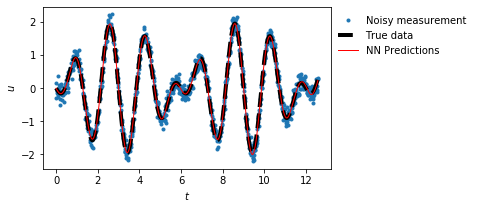

In [8]:
y_pred = y.eval(t_data)

fig, ax = plt.subplots(1,1,figsize=(8,3))
ax.plot(t_data, y_data + y_noise, '.', label='Noisy measurement')
ax.plot(t_data, y_data, '--k', lw=4, label='True data')
ax.plot(t_data, y_pred, 'r', lw=1, label='NN Predictions')
ax.set_xlabel('$t$')
ax.set_ylabel('$u$')
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0), framealpha=0.)
plt.subplots_adjust(0.25, 0.15, 0.75, 0.9)

plt.savefig('denoising.pdf', dpi=600)

The final values of weights and biases are obtained: 